In [1]:
%load_ext watermark
%watermark -a "Alessandro Parisi" -u -d -v -p numpy,pandas,matplotlib,sklearn,seaborn
# to install watermark launch 'pip install watermark' at command line
import warnings 
warnings.simplefilter('ignore')

Alessandro Parisi 
last updated: 2019-02-18 

CPython 3.5.4
IPython 6.1.0

numpy 1.16.1
pandas 0.20.3
matplotlib 2.0.2
sklearn 0.20.0
seaborn 0.8.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

df = pd.read_csv('../datasets/sms_spam_svm.csv')

y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)



In [4]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


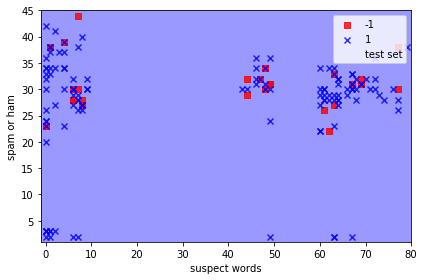

In [5]:
# Thanks to Sebastian Raschka for 'plot_decision_regions'
# https://github.com/rasbt/python-machine-learning-book
from defs import plot_decision_regions

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=svm, test_idx=range(-15, 15))
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 7
Accuracy: 0.84
